# SEARCH FOR A QUESTION

In [1]:
import pandas as pd
import plotly.express as px
# import matplotlib.potly as plt
%matplotlib inline

##### **DATA FILE**

CSV file contains data about NFL players and draft.

Problems:
* When player's name contains `Jr.` part row in file has too many colons - It was necessary to remove colons before every ` Jr.` string.

In [2]:
filepath = 'data/combine.csv'
df = pd.read_csv(filepath)
df

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,42.5,130,24,0,Nebraska,NaN,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.0,0,12,0,USC,NaN,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,39.0,121,19,0,Boise St.,NaN,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,36.0,121,24,0,LSU,NaN,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,34.0,121,13,0,West Virginia,NaN,0,0,0,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,1999,Daren Yancey,Daren,Yancey,DT,6,6.0,78.0,303,0.0,...,26.5,97,0,6,Brigham Young,19(188),19,188,0,0.0
4943,1999,Craig Yeast,Craig,Yeast,WR,5,8.0,68.0,164,0.0,...,32.5,112,0,4,Kentucky,3(98),3,98,0,0.0
4944,1999,Ryan Young,Ryan,Young,OT,6,6.0,78.0,335,0.0,...,0.0,0,20,7,Kansas State,17(223),17,223,0,0.0
4945,1999,Peppi Zellner,Peppi,Zellner,DE,6,5.0,77.0,246,0.0,...,35.5,122,20,4,Fort Valley State,37(132),37,132,0,0.0


## NFL Grade

In [3]:
px.box(df, x='year', y='nflgrade', title='NFL Grade distribution by Year')

In [4]:
df_grade = df[df.nflgrade > 0]
df_grade.shape

(646, 26)

##### NFL Grade distribution
NFL Grades contain only players drafted since 2014 - It is **646** non-zero records.

## DRAFT/PICKS

In [5]:
df_pick = df[(~df.pick.isna()) & (df.picktotal > 0)]
df_pick.shape

(3044, 26)

In [6]:
px.box(df, x='year', y='pickround', title='NFL pickround distribution by Year')

In [7]:
px.box(df_pick, x='year', y='pickround', title='NFL pickround distribution by Year')


##### NFL draft distribution

Only the latest (2015) year has not saved picks. There is **3044** records with filled pcikround column.

## CHECK DATA CLEANLINESS

In [8]:
df.columns

Index(['year', 'name', 'firstname', 'lastname', 'position', 'heightfeet',
       'heightinches', 'heightinchestotal', 'weight', 'arms', 'hands',
       'fortyyd', 'twentyyd', 'tenyd', 'twentyss', 'threecone', 'vertical',
       'broad', 'bench', 'round', 'college', 'pick', 'pickround', 'picktotal',
       'wonderlic', 'nflgrade'],
      dtype='object')

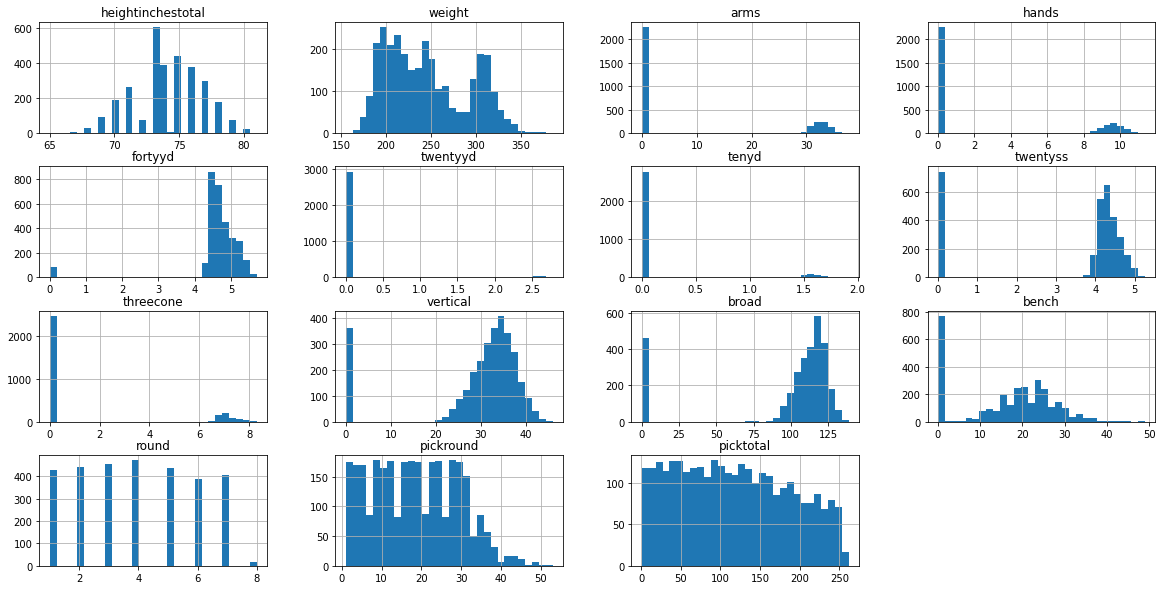

In [9]:
columns = [
    'position', 'heightinchestotal', 'weight', 'arms', 'hands',
    'fortyyd', 'twentyyd', 'tenyd', 'twentyss', 'threecone', 'vertical',
    'broad', 'bench', 'round', 'college', 'pickround', 'picktotal'
]
_ = df_pick[columns].hist(figsize=(20, 10), bins=30)

In [10]:
df_pick[(df_pick.position.isna()) | (df_pick.college.isna())].shape
df_pick.dropna(subset=['position', 'college'], inplace=True)

/tmp/ipykernel_285544/1556135914.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
valuable_col = []
for col in columns:
    if df[col].dtype != 'object':
        percent_more_zero = df_pick[df_pick[col] > 0].shape[0]/df_pick.shape[0]
        if percent_more_zero > 0.7:
            valuable_col.append(col)
    else:
        valuable_col.append(col)

In [12]:
corr = df_pick[valuable_col].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_285544/202832445.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,heightinchestotal,weight,fortyyd,twentyss,vertical,broad,bench,round,pickround,picktotal
heightinchestotal,1.00,0.72,0.22,0.12,-0.16,-0.10,0.20,-0.04,-0.03,-0.04
weight,0.72,1.00,0.28,0.11,-0.27,-0.19,0.45,-0.02,-0.01,-0.02
fortyyd,0.22,0.28,1.00,0.27,0.21,0.21,0.15,0.02,0.03,0.03
twentyss,0.12,0.11,0.27,1.00,0.48,0.53,0.05,0.05,0.01,0.04
vertical,-0.16,-0.27,0.21,0.48,1.00,0.75,-0.09,-0.03,0.02,-0.02
broad,-0.10,-0.19,0.21,0.53,0.75,1.00,-0.04,0.01,0.00,0.01
bench,0.20,0.45,0.15,0.05,-0.09,-0.04,1.00,-0.01,0.01,-0.01
round,-0.04,-0.02,0.02,0.05,-0.03,0.01,-0.01,1.00,0.16,0.99
pickround,-0.03,-0.01,0.03,0.01,0.02,0.00,0.01,0.16,1.00,0.31
picktotal,-0.04,-0.02,0.03,0.04,-0.02,0.01,-0.01,0.99,0.31,1.00


#### CHOSEN COLUMNS

* position
* college
* heightinchestotal	
* weight	
* fortyyd (40 yard dash)	
* twentyss (20 yard shuttle)
* vertical (jump)
* broad	(jump)
* bench (press)

#### SEARCHING RESULT

* picktotal
* pickround


In [13]:
def count_zeros(record):
    return sum(record == 0)

df_pick = df_pick[valuable_col]
df_pick['zeros'] = df_pick[valuable_col].apply(count_zeros, axis=1)
df_pick.zeros.value_counts()

0    1673
1     813
3     254
2     200
4      72
5      31
Name: zeros, dtype: int64

In [14]:
df_pick.drop(df_pick[df_pick.zeros > 3].index, axis=0, inplace=True)
df_pick.zeros.value_counts()

0    1673
1     813
3     254
2     200
Name: zeros, dtype: int64

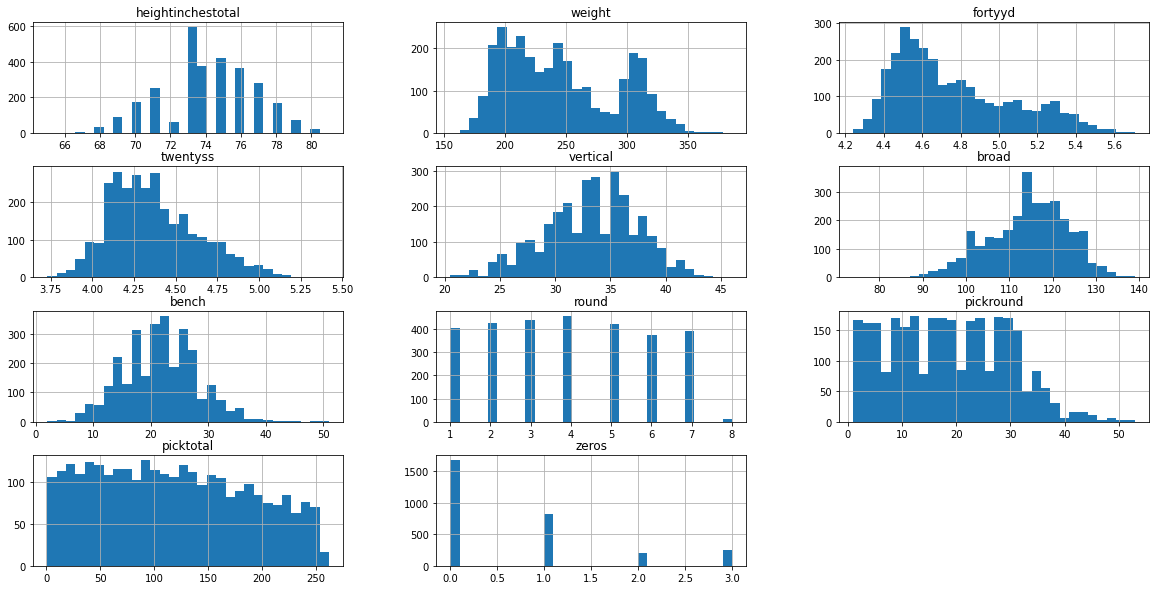

In [15]:
def get_sample(df, col):
    df_sample = df[df[col] > 0]
    sample = df_sample.sample(n=1)[col].item()
    return sample
    
for col in valuable_col:
    if df_pick[col].dtype != 'object':
        for record in df_pick.iterrows():
            if record[1][col] == 0:
                df_pick.loc[record[0], col] = get_sample(df, col)
                        
_ = df_pick.hist(figsize=(20, 10), bins=30)

#### FILLING ZEROS

zeros were replaced by random sample from the same column except zeros (distribution of the column stays the same except zero values).

In [16]:
df_pick.drop(columns=['zeros', 'round'], inplace=True)
df_pick.columns

Index(['position', 'heightinchestotal', 'weight', 'fortyyd', 'twentyss',
       'vertical', 'broad', 'bench', 'college', 'pickround', 'picktotal'],
      dtype='object')

In [17]:
df_pick.to_csv('data/combine_clean.csv')

# **QUESTION**: WHEN PLAYER WILL BE PICKED?